In [3]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks/karen_building_blocks_analysis'

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, generate_abundance_matrix
from src.utils.visualization import plot_scatter_pca, plot_cumulative_explained_variance, plot_PCAs, plot_CVEs

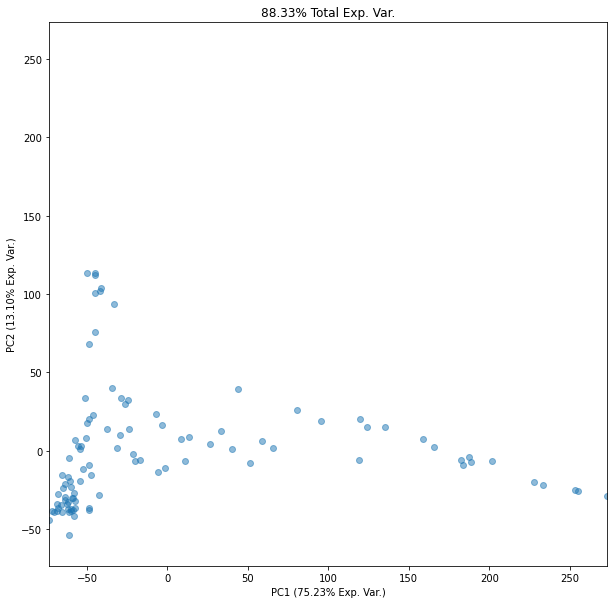

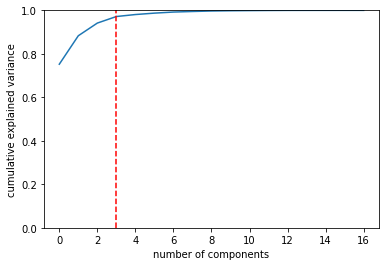

In [6]:
N_SITE = 100
PATIENT_ID = 4
RADIUS = 100
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
METHOD = 'abs'
PCA_SCALED = False 
ROOT_DATA_PATH = "../../../output/cell_positions_data"

cell_ab = CellAbundance(PATIENT_ID, N_SITE, RADIUS, CELL_TYPES, method=METHOD, root=ROOT_DATA_PATH)
pc = cell_ab.perform_PCA(scale=PCA_SCALED)
plot_scatter_pca(pc, cell_ab.pca.explained_variance_ratio_)
plot_cumulative_explained_variance(cell_ab.pca.explained_variance_ratio_)

In [7]:
def generate_abundance_matrix(patient_ids, n_site, radius, method, snr=1):
    return [CellAbundance(p, n_site, radius, CELL_TYPES, method=method,snr=snr, root=ROOT_DATA_PATH) for p in patient_ids]

In [8]:
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100

# Normalized (Fractional) Abundance Matrix Results

In [18]:
normalized_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', root=ROOT_DATA_PATH)

### PCA centered and not scaled

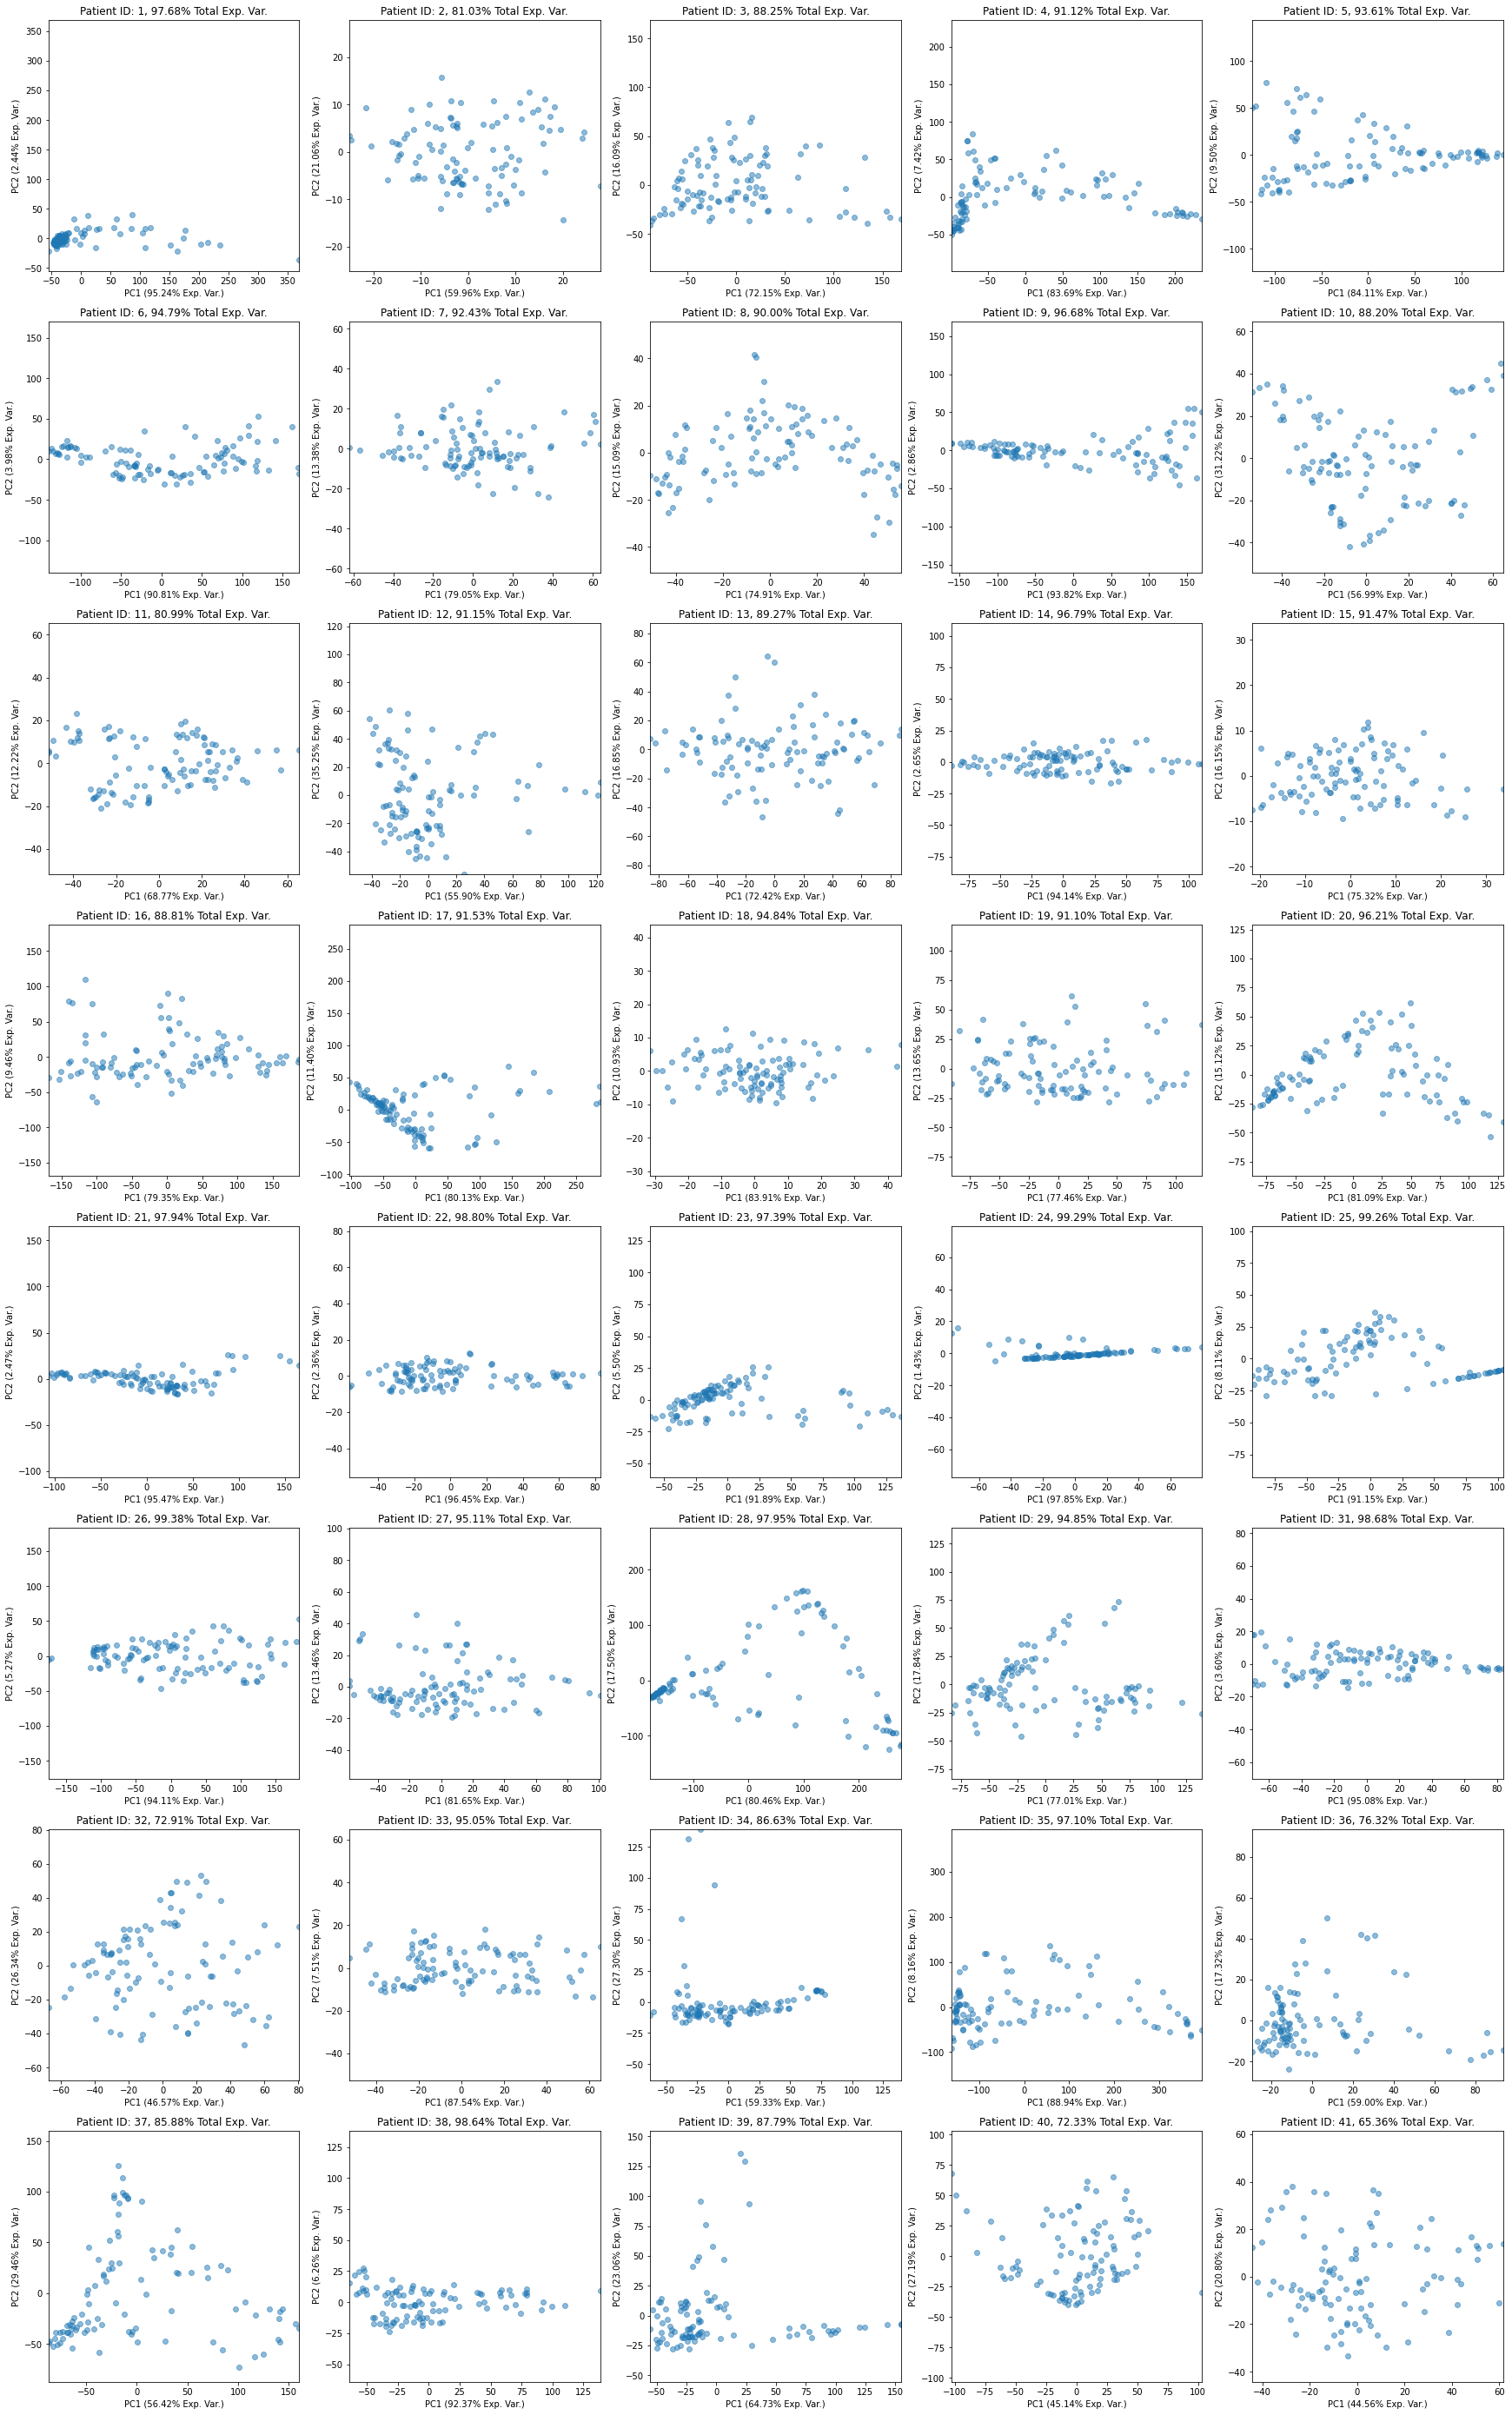

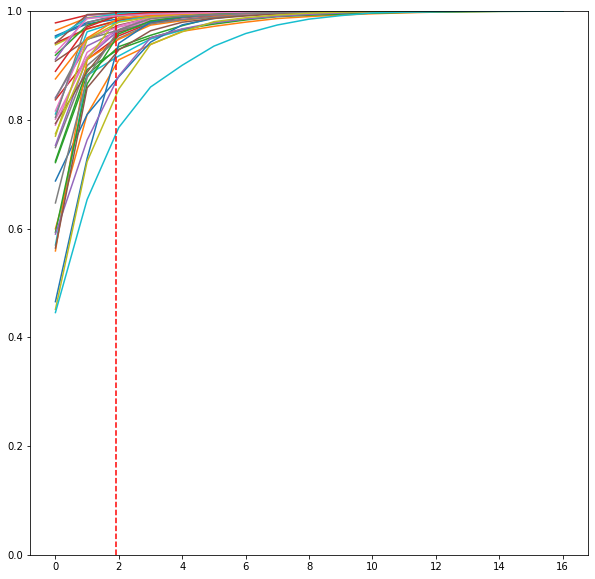

In [19]:
scaling = False
plot_PCAs(normalized_ca_list, scale_pca=scaling, fix_axis=False)
plot_CVEs(normalized_ca_list, scale_pca=scaling)

### PCA centered and scaled

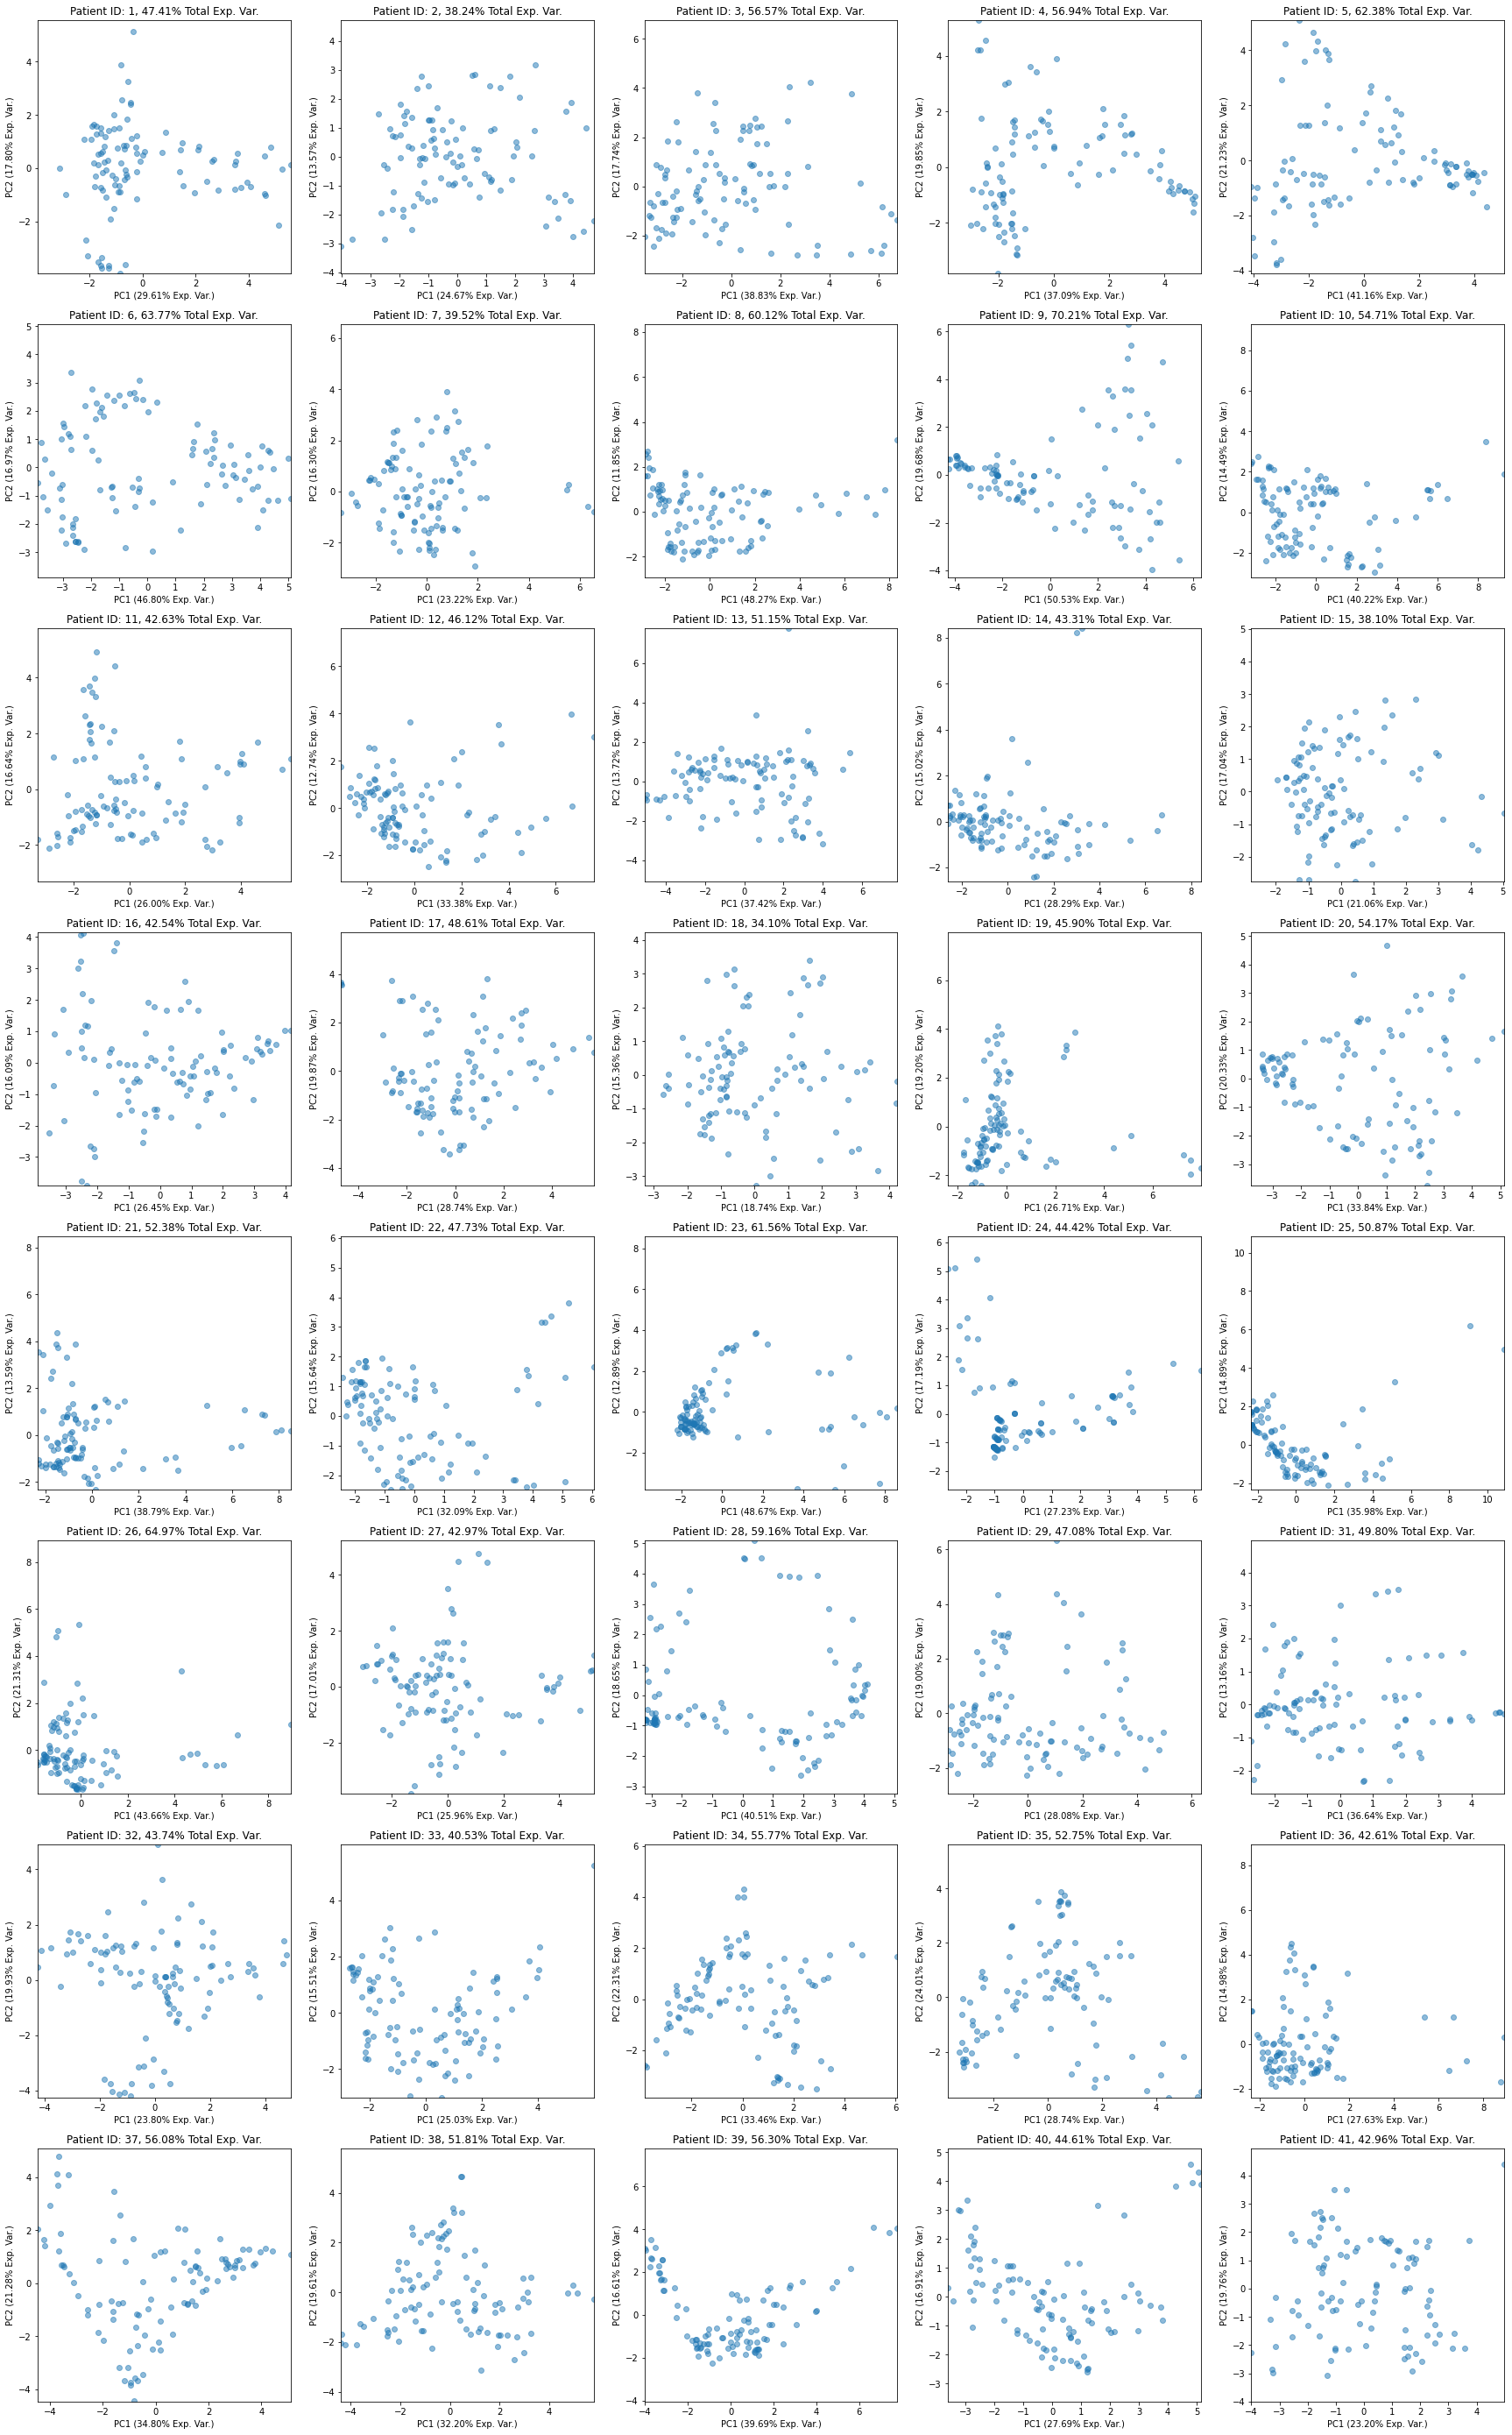

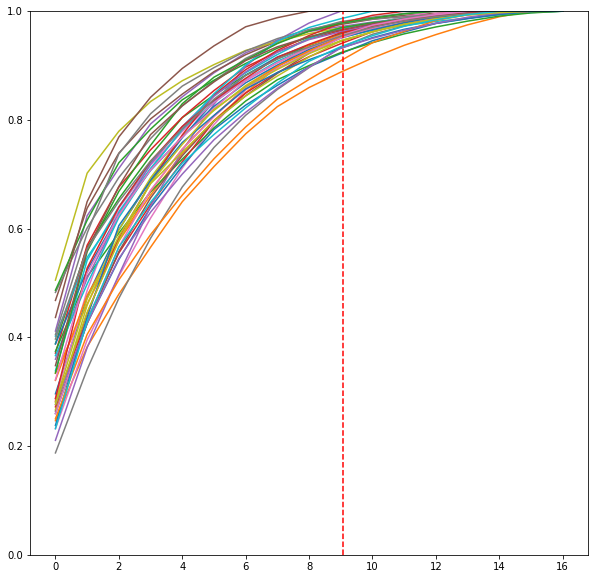

In [20]:
scaling = True
plot_PCAs(normalized_ca_list, scale_pca=scaling, fix_axis=False)
plot_CVEs(normalized_ca_list, scale_pca=scaling)

# Absolute Abundance Matrix Results

In [22]:
absolute_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', root=ROOT_DATA_PATH)

### PCA centered and not scaled

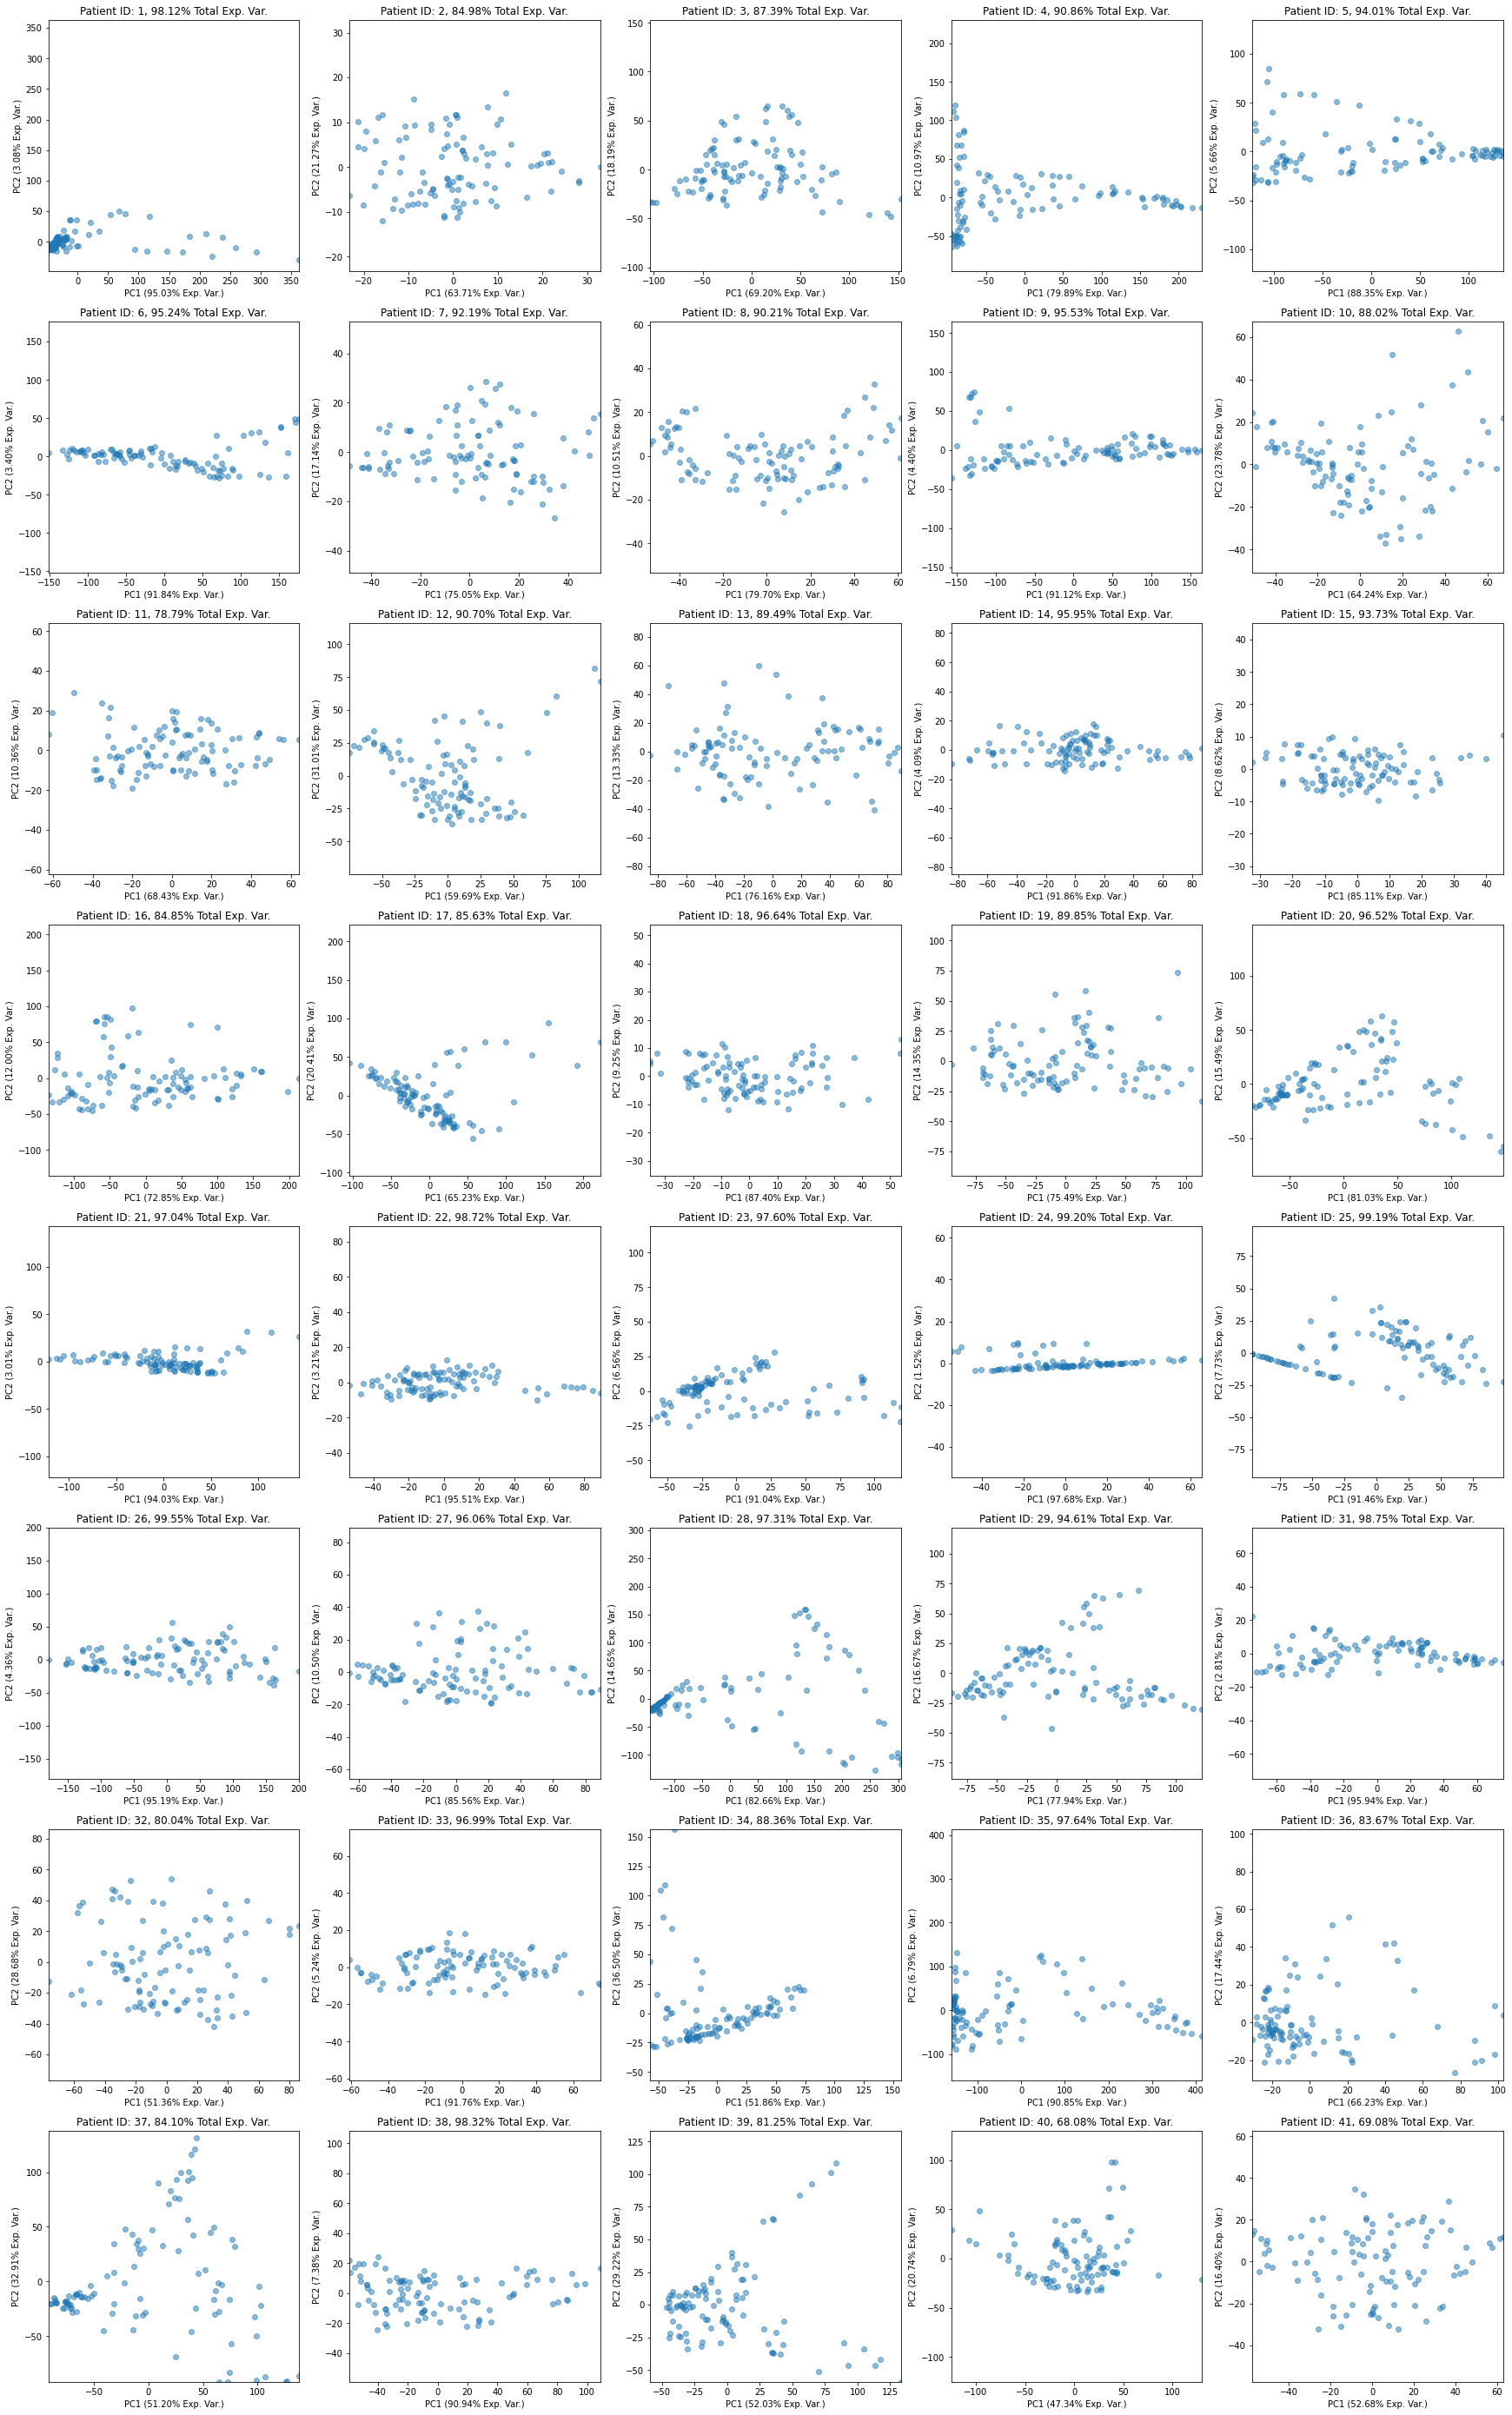

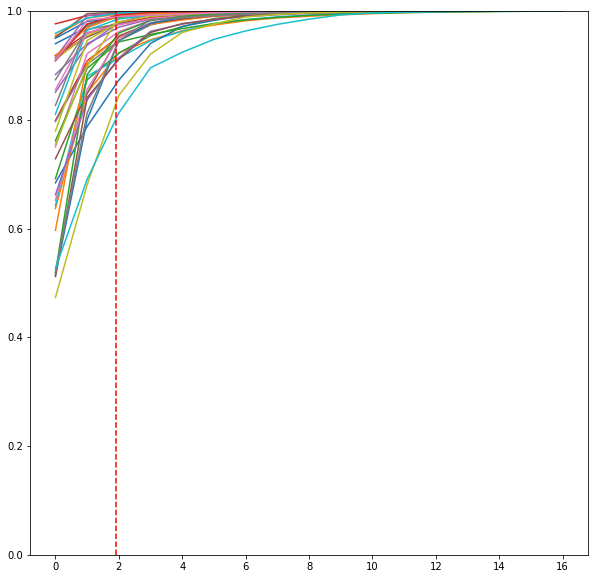

In [21]:
scaling = False
plot_PCAs(absolute_ca_list, scale_pca=scaling)
plot_CVEs(absolute_ca_list, scale_pca=scaling)

### PCA centered and scaled

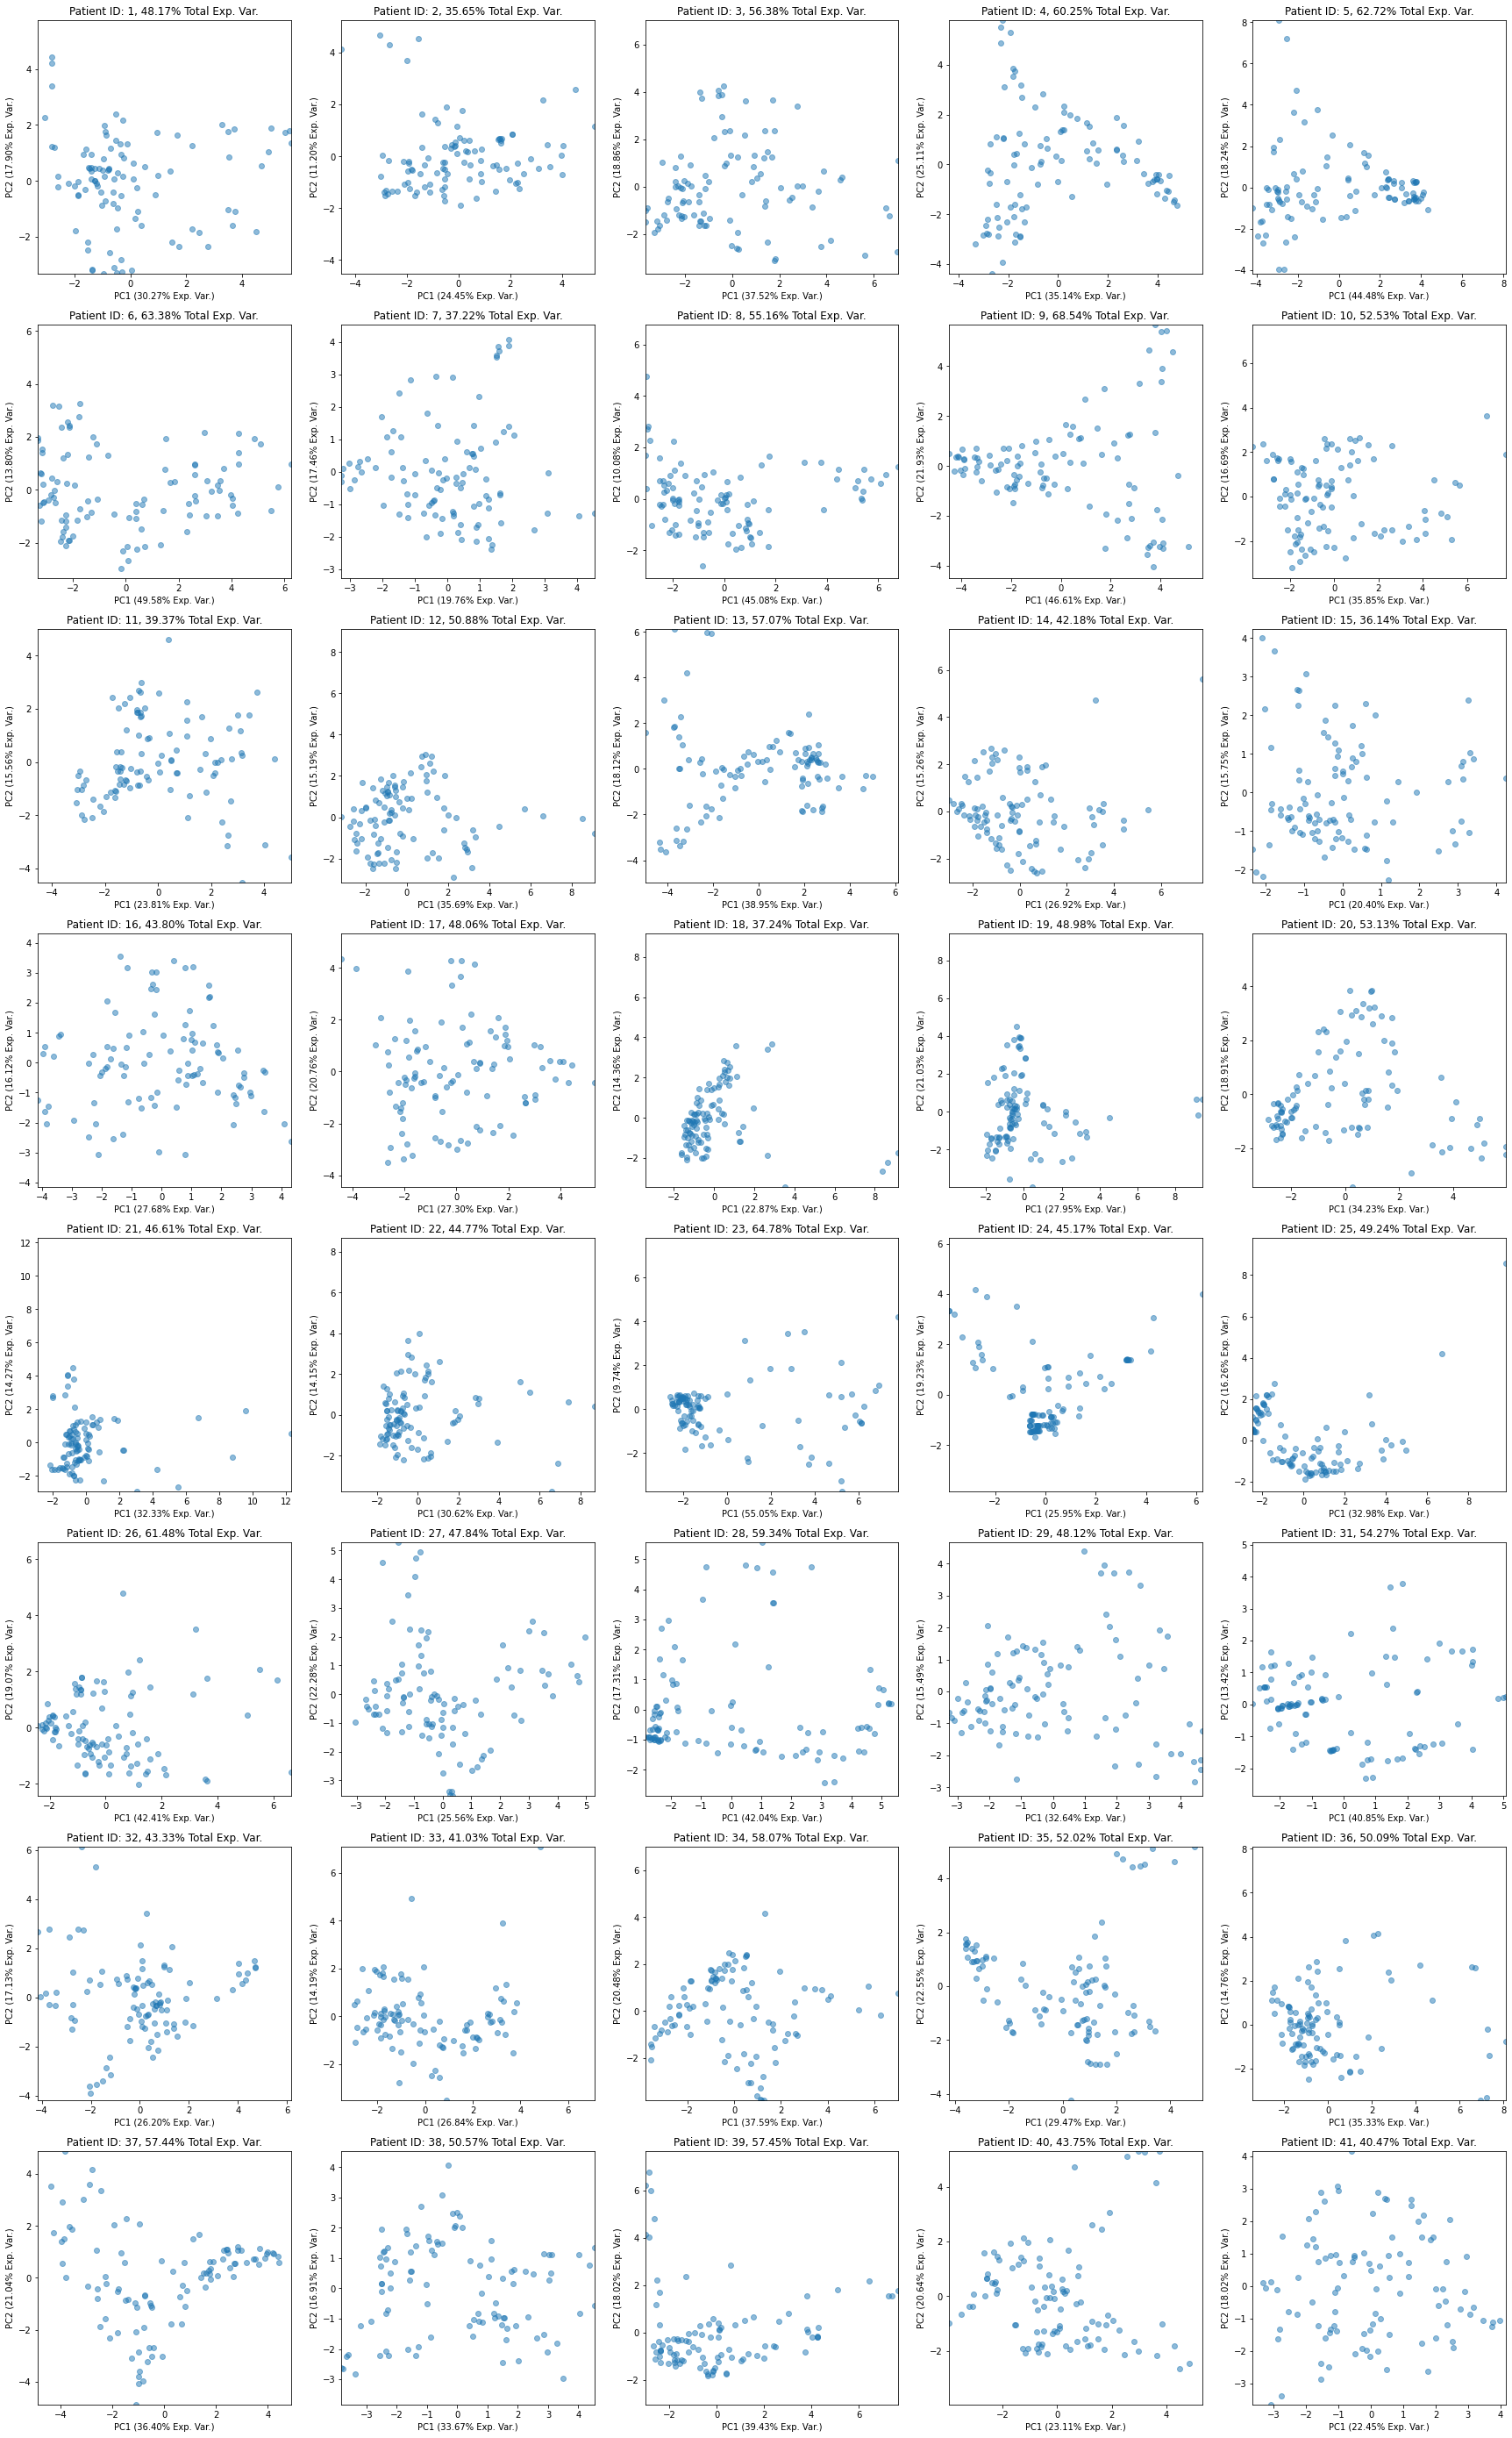

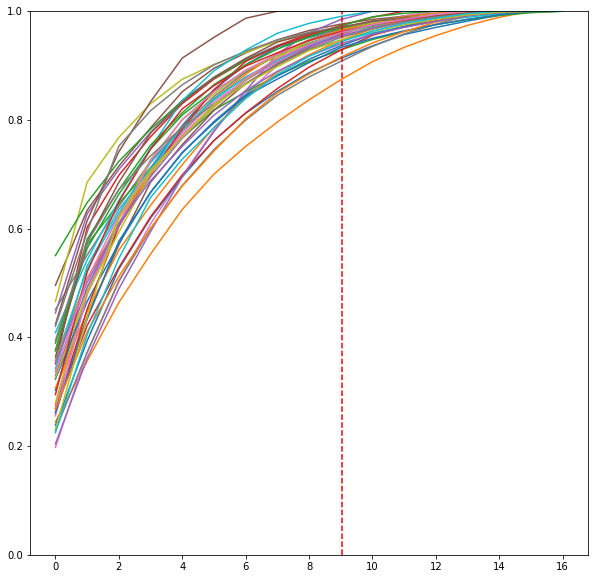

In [22]:
scaling = True
plot_PCAs(absolute_ca_list, scale_pca=scaling)
plot_CVEs(absolute_ca_list, scale_pca=scaling)